# General overview

In [2]:
import pandas as pd
import matplotlib 
df = pd.read_json('../Data/academia3.json')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   votes          1537 non-null   int64 
 1   answers_count  1537 non-null   int64 
 2   closed         1537 non-null   bool  
 3   title          1537 non-null   object
 4   views          1537 non-null   int64 
 5   tags           1537 non-null   object
 6   asked          1535 non-null   object
 7   post_text      1537 non-null   object
 8   comments       1381 non-null   object
 9   answers        1537 non-null   object
dtypes: bool(1), int64(3), object(6)
memory usage: 109.7+ KB


In [3]:
df['asked'] = pd.to_datetime(df['asked'],utc= True)


In [4]:
mask =(df['asked'] < pd.to_datetime('2020-01-01 00:00Z', utc=True))
limited = df.loc[mask]

## Number of question per year
from 2012 till 2018

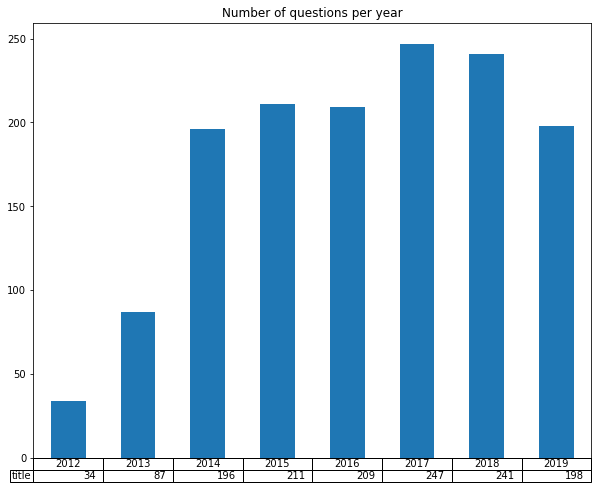

In [5]:
import matplotlib.pyplot as plt
import numpy as np
trend_of_questions = limited['title'].groupby([df.asked.dt.year]).agg('count')
idx = {}
for i in trend_of_questions.index.tolist():
    idx[i] = int(np.round(i,0))
trend_of_questions = trend_of_questions.rename(index = idx )

ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
trend_of_questions.plot(ax = ax1,x='asked', y='answer_count', kind ='bar', figsize=(10,8), table= True, legend= False)
plt.title('Number of questions per year')
plt.savefig('./figures/number_of_question_per_year.png', bbox_inches='tight')
plt.show()
# np.round(trend_of_questions.index.tolist(),0)

In [6]:
import collections

question2017 = df.loc[df['asked'].map(lambda x : x.year == 2017)]
question2018 = df.loc[df['asked'].map(lambda x : x.year == 2018)]


tags_2017 = []
for a in question2017['tags']:
    tags_2017 += a
    

cnt_2017 = collections.Counter(tags_2017)
cnt_2017.most_common()

tags_2018 = []
for a in question2018['tags']:
    tags_2018 += a
    

cnt_2018 = collections.Counter(tags_2018)
cnt_2018.most_common()

cnt_2017 = dict(cnt_2017)
cnt_2018 = dict(cnt_2018)
df_see_deviation = pd.DataFrame(cnt_2017.values(),index=cnt_2017.keys(),columns = ['2017'] )

# df_see_deviation.append()
df_see_deviation = df_see_deviation.merge(pd.DataFrame(cnt_2018.values(),index=cnt_2018.keys(), columns=['2018']),how='outer', right_index= True, left_index= True)

for t in df_see_deviation.index.to_list():
    mean = df.loc[df.apply(lambda x :  t in x['tags'],axis=1)]['title'].rename(t).groupby([df.asked.dt.year]).agg('count').mean()
    
    df_see_deviation.at[t, 'mean'] =  mean
df_see_deviation  = df_see_deviation.sort_values(by='mean', ascending = False) 



In [7]:
df_see_deviation['2018_difference_from_mean'] = (df_see_deviation['2018'] - df_see_deviation['mean']).abs()
df_see_deviation['2017_difference_from_mean'] = (df_see_deviation['2017'] - df_see_deviation['mean']).abs()
df_see_deviation.sort_values(by='2018_difference_from_mean', ascending = False) 

,2017,2018,mean,2018_difference_from_mean,2017_difference_from_mean
ethics,247.0,241.0,170.555556,70.444444,76.444444
publications,51.0,47.0,37.222222,9.777778,13.777778
exams,5.0,14.0,6.375000,7.625000,1.375000
etiquette,14.0,19.0,11.777778,7.222222,2.222222
authorship,25.0,23.0,15.777778,7.222222,9.222222
...,...,...,...,...,...
europe,1.0,NaN,1.000000,NaN,0.000000
evaluation,1.0,NaN,1.000000,NaN,0.000000
reproducible-research,1.0,NaN,1.000000,NaN,0.000000
extracurricular,1.0,NaN,1.000000,NaN,0.000000


In [8]:
df.groupby(df.asked.dt.hour)['answers_count'].sum()
df.groupby(df.asked.dt.weekday).mean()

,votes,answers_count,closed,views
asked,,,,
0.0,22.427184,3.606796,0.101942,4788.961165
1.0,17.237410,3.187050,0.057554,4321.165468
2.0,18.068966,3.271552,0.038793,3876.685345
3.0,13.863830,3.038298,0.076596,3078.953191
4.0,14.131579,2.929825,0.083333,2587.504386
5.0,14.820225,2.932584,0.084270,4951.831461
6.0,16.747191,3.280899,0.106742,3609.837079


## Avarage count of question from 2012 till 2019

In [9]:
limited_statistics = limited.groupby([df.asked.dt.month.rename('month')]).describe()
limited_statistics.columns


MultiIndex([(        'votes', 'count'),
            (        'votes',  'mean'),
            (        'votes',   'std'),
            (        'votes',   'min'),
            (        'votes',   '25%'),
            (        'votes',   '50%'),
            (        'votes',   '75%'),
            (        'votes',   'max'),
            ('answers_count', 'count'),
            ('answers_count',  'mean'),
            ('answers_count',   'std'),
            ('answers_count',   'min'),
            ('answers_count',   '25%'),
            ('answers_count',   '50%'),
            ('answers_count',   '75%'),
            ('answers_count',   'max'),
            (        'views', 'count'),
            (        'views',  'mean'),
            (        'views',   'std'),
            (        'views',   'min'),
            (        'views',   '25%'),
            (        'views',   '50%'),
            (        'views',   '75%'),
            (        'views',   'max')],
           )

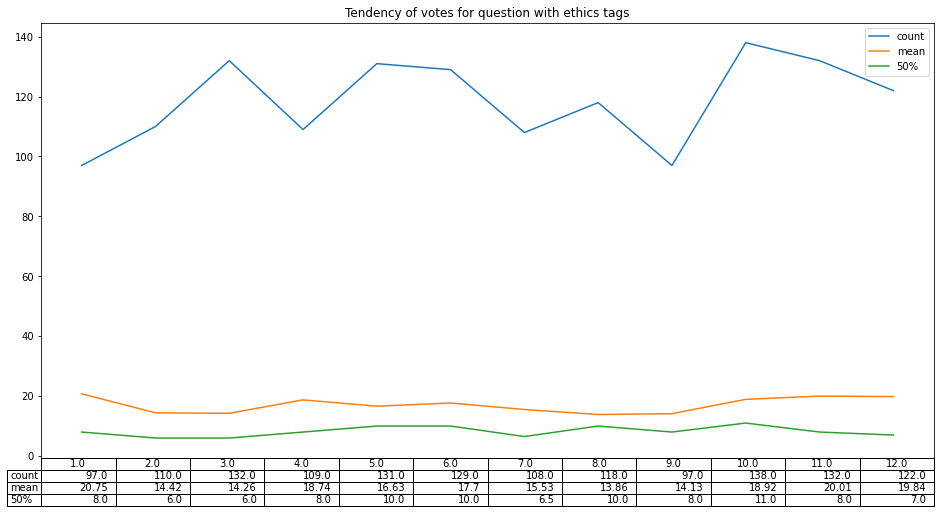

In [10]:
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

x_axis = ax.axes.get_xaxis()
ax.xaxis.tick_top()
x_axis.set_visible(False)
d = limited_statistics['votes'][['count','mean','50%']]
d.plot(ax=ax, title='Tendency of votes for question with ethics tags', table = np.round(d.T,2))
plt.savefig('./figures/tendency_of_votes_ethic.png', bbox_inches = 'tight')

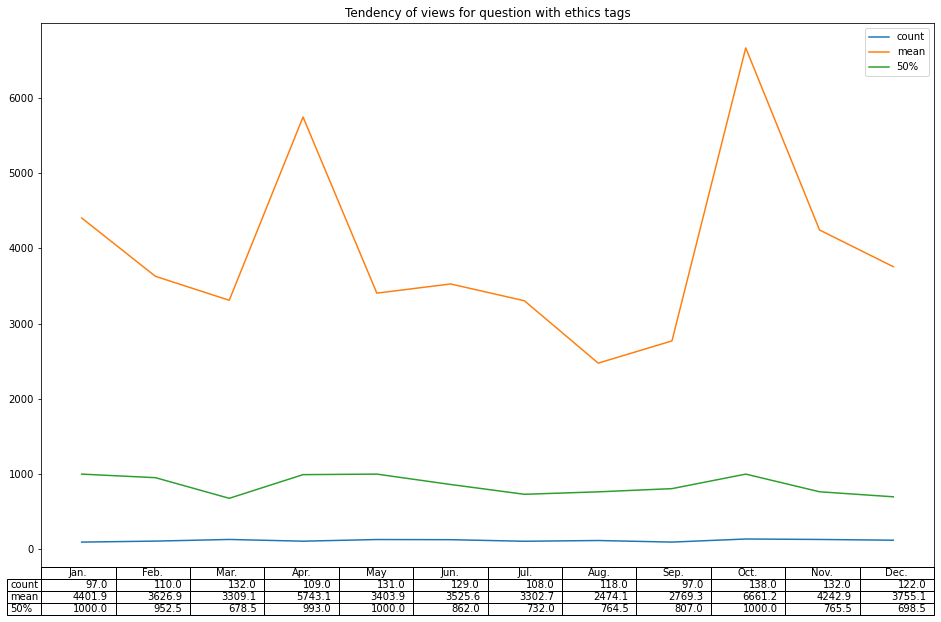

In [11]:
fig, ax = plt.subplots(1, 1)
d = limited_statistics['views'][['count','mean','50%']]
idx = {1.0:'Jan.',2.0: 'Feb.',3.0: 'Mar.',4.0: 'Apr.',5.0: 'May',6.0:'Jun.',7.0:'Jul.',8.0: 'Aug.',9.0: 'Sep.', 10.0:'Oct.',11.0:'Nov.', 12.0:'Dec.'}
d = d.rename(index = idx)
d = np.round(d,1)
x_axis = ax.axes.get_xaxis()
ax.xaxis.tick_top()
x_axis.set_visible(False)
d.plot( figsize=(16,10), title='Tendency of views for question with ethics tags',ax = ax,
                                                         table = np.round(d.T,1)
                                                         )
plt.savefig('./figures/tendency_of_views_ethic.png', bbox_inches = 'tight')

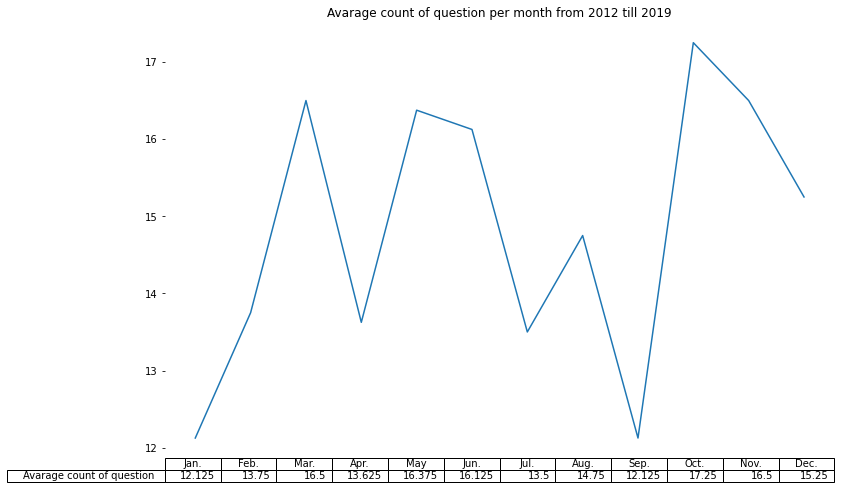

In [12]:
from pandas.plotting import table
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
avarege_q_month = limited['title'].groupby([df.asked.dt.month.rename('month')]).agg(count ='count')
avarege_q_month = avarege_q_month['count']/8
avarege_q_month

avarege_q_month = avarege_q_month.rename('Avarage count of question')
idx = {1.0:'Jan.',2.0: 'Feb.',3.0: 'Mar.',4.0: 'Apr.',5.0: 'May',6.0:'Jun.',7.0:'Jul.',8.0: 'Aug.',9.0: 'Sep.', 10.0:'Oct.',11.0:'Nov.', 12.0:'Dec.'}

avarege_q_month = avarege_q_month.rename(index = idx)
avarege_q_month.plot(table= True, figsize=(12,8), use_index = True, title ='Avarage count of question per month from 2012 till 2019',
                   )
plt.savefig('figures/a_n_count.png', bbox_inches = 'tight')



## Count of question in year 2020
possible impact of coronavirus on number of question

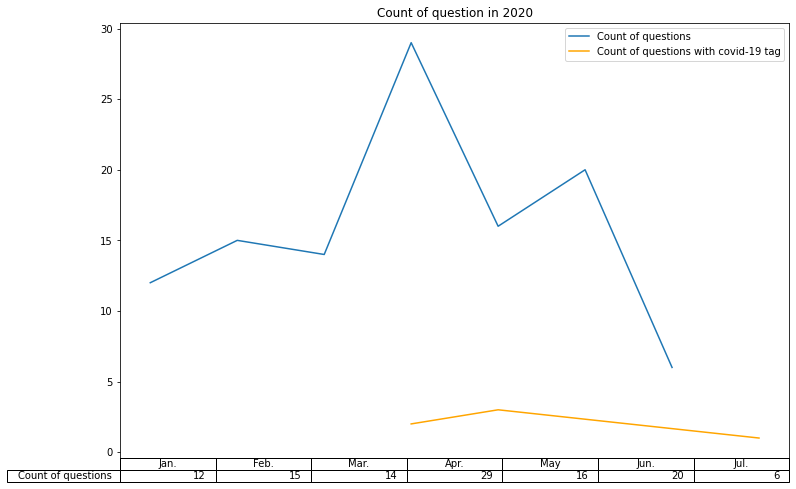

In [13]:
data2020= df.loc[(df['asked'] > pd.to_datetime('2020-01-01 00:00Z', utc=True))]
data2020 = data2020['title'].groupby([df.asked.dt.month.rename('month')]).agg(count = 'count')

coronadata = df.loc[df.apply(lambda x :  'covid-19' in x['tags'],axis=1)]['title'].groupby([df.asked.dt.month.rename('month')]).agg(count = 'count')
coronadata = coronadata.rename(columns = {'count':'Count of questions with covid-19 tag'})

idx = {1.0:'Jan.',2.0: 'Feb.',3.0: 'Mar.',4.0: 'Apr.',5.0: 'May',6.0:'Jun.',7.0:'Jul.'}
data2020 = data2020.rename(index = idx,columns = {'count':'Count of questions'})
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
data2020.plot(ax = ax1,table= True, figsize=(12,8), title ='Count of question in 2020', legend = True,)
coronadata.plot(ax = ax1, figsize=(12,8), title ='Count of question in 2020', legend = True,color= 'orange')
# where df is your data frame
plt.savefig('./figures/tabl2020withcorona.png', bbox_inches='tight',)


# s = pd.Series([0,0],index = [1,2])
# coronadata.append(pd.Series({'Count of questions with covid-19 tag' : 0},name = 1.0))
# coronadata.append(pd.Series({'Count of questions with covid-19 tag' : 0},name = 2.0))

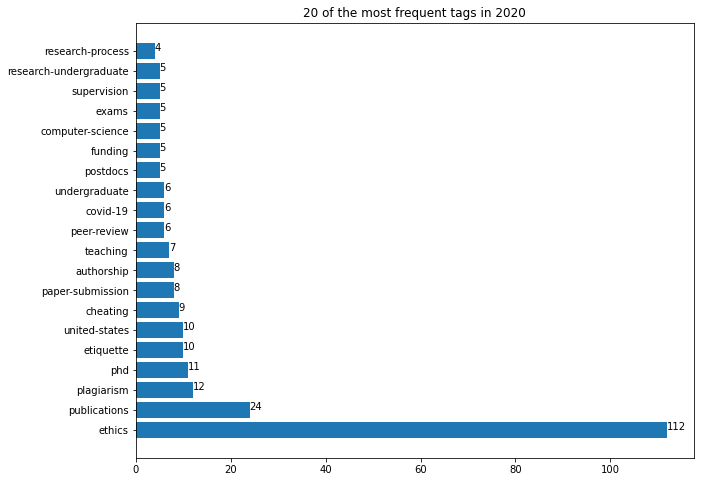

In [14]:
import collections
top = 20
all_tags = []
data2020= df.loc[(df['asked'] > pd.to_datetime('2020-01-01 00:00Z', utc=True))]
for a in data2020['tags']:
    all_tags += a

cnt_all = collections.Counter(all_tags)
cnt_all.most_common()

commont_dict ={}

for w,f in cnt_all.most_common():
    commont_dict[w] = f
    n = 20
    
df_coocurences = pd.DataFrame.from_dict(dict(cnt_all), columns=[ 'Number of occurences'], orient='index')
df_coocurences.sort_values(by='Number of occurences',ascending = False, inplace= True)
# df_coocurences.head(15).plot(kind = 'barh', figsize=(10,10))
data = df_coocurences.head(n)
plt.figure(figsize=(10,8))
plt.barh(data.index,data['Number of occurences'])

plt.title(str(n)+' of the most frequent tags in 2020')
for index, value in enumerate(data['Number of occurences']):
    plt.text(value, index, str(value))
plt.savefig('./figures/most_frequenta_tagsin2020',bbox_inches='tight')

## The most frequent tags in question

In [15]:
import collections
top = 20
all_tags = []
for a in df['tags']:
    all_tags += a

cnt_all = collections.Counter(all_tags)
cnt_all.most_common()

commont_dict ={}

for w,f in cnt_all.most_common():
    commont_dict[w] = f
    


In [16]:
cnt_all['covid-19']

6

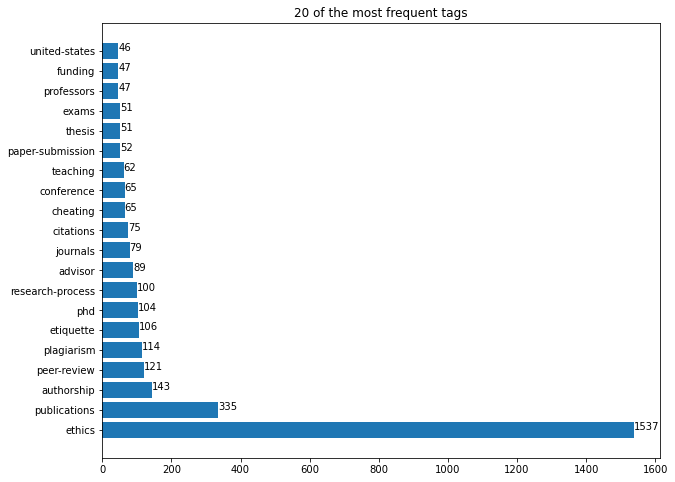

In [17]:
n = 20
df_coocurences = pd.DataFrame.from_dict(dict(cnt_all), columns=[ 'Number of occurences'], orient='index')
df_coocurences.sort_values(by='Number of occurences',ascending = False, inplace= True)
# df_coocurences.head(15).plot(kind = 'barh', figsize=(10,10))
data = df_coocurences.head(n)
plt.figure(figsize=(10,8))
plt.barh(data.index,data['Number of occurences'])

plt.title(str(n)+' of the most frequent tags')
for index, value in enumerate(data['Number of occurences']):
    plt.text(value, index, str(value))
plt.savefig('./figures/most_frequenta_tags',bbox_inches='tight')

## Function for WordCloud, possibly used for presentation


In [18]:
from wordcloud import WordCloud
def word_cloud(data_dict, name):
    cloud = WordCloud(
            background_color='white',
            width=2500,
            height=1800,
            max_words=top,
            min_font_size=25,
            colormap='tab10',
            color_func=lambda *args, **kwargs: "black",
            prefer_horizontal=1.0)
    cloud.generate_from_frequencies(data_dict)
    plt.imshow(cloud)
    plt.axis("off")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.savefig('./figures/' + name)
    plt.show()

In [19]:
import json
with open("most_common_tags.json", "w") as fp:
    json.dump(commont_dict,fp) 


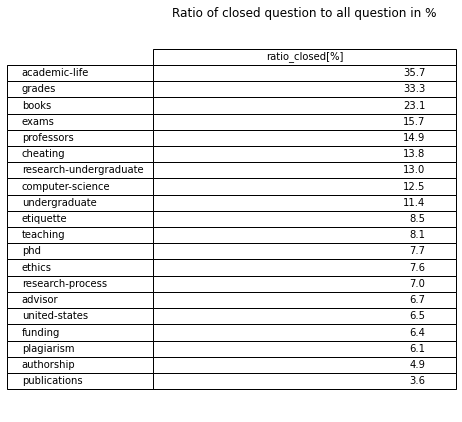

In [20]:

import collections
top = 20
all_tags = []

for a in df.loc[df['closed'] == True]['tags']:
    all_tags += a

cnt = collections.Counter(all_tags)

closed = {}
for w,f in cnt.most_common()[:top]:
    closed[w] = f

closed_ratio = pd.DataFrame(index = closed.keys())
closed_value = [v for k,v in closed.items()]
all_value = [ cnt_all[k] for k in closed.keys()]
closed_ratio['closed'] = closed_value
closed_ratio['count'] = all_value
closed_ratio = closed_ratio.sort_values(by='closed', ascending = False)

closed_ratio['ratio_closed[%]'] = round(closed_ratio['closed']/closed_ratio['count'] *100,3)
closed_ratio = closed_ratio.sort_values(by='ratio_closed[%]', ascending = False)

closed_ratio

plt.figure(figsize=(4,8))
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

t = table(ax, np.round(closed_ratio['ratio_closed[%]'],1),loc = 'center')  # where df is your data frame
t.set_fontsize(10)
t.scale(1.5, 1.5) 
plt.subplots_adjust(left=0.2, bottom=0.2,)
plt.title('Ratio of closed question to all question in %')
plt.savefig('./figures/ratio_of_closed.png',bbox_inches='tight')


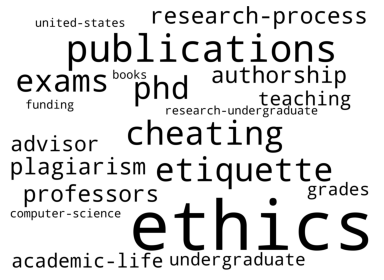

In [21]:
word_cloud(closed,'closed_wc.png')

## Basic statistics for answercount, votes, views

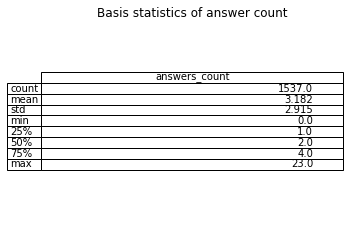

In [22]:

d = df['answers_count'].describe()
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, np.round(d,3),loc = 'center')  # where df is your data frame
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.title('Basis statistics of answer count')
plt.savefig('./figures/basic_answer_count.png')



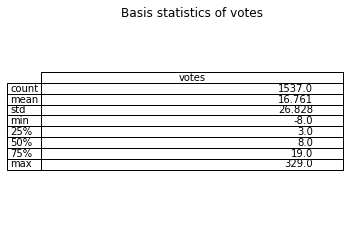

In [23]:
d = df['votes'].describe()
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, np.round(d,3),loc = 'center')  # where df is your data frame
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.title('Basis statistics of votes')
plt.savefig('./figures/basic_votes.png')


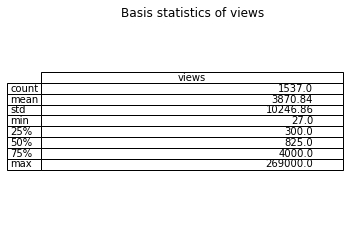

In [24]:
d = df['views'].describe()
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, np.round(d,3),loc = 'center')  # where df is your data frame
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.title('Basis statistics of views')
plt.savefig('./figures/basic_answer_views.png')

## Rate of positively and negative evalueted question for N od most frequent tags

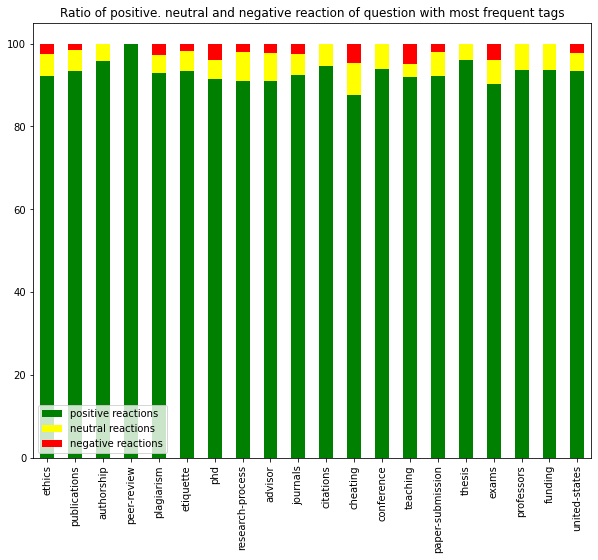

In [25]:
import json
all_tags = []
for a in df.loc[df['votes']> 0]['tags']:
    all_tags += a
cnt_positive = collections.Counter(all_tags)
cnt_positive.most_common(10)
positive_dict = {}
for w,f in cnt_positive.most_common():
    positive_dict[w] = f



all_tags = []
for a in df.loc[df['votes']< 0]['tags']:
    all_tags += a  
cnt_negative = collections.Counter(all_tags)

negative_dict = {}
for w,f in cnt_negative.most_common():
    negative_dict[w] = f

result = {}
for k, v in commont_dict.items():
    neg_rate = 0
    pos_rate = 0
    if k in negative_dict.keys():
        neg_rate = (negative_dict[k] / v)*100
    if k in positive_dict.keys():
        pos_rate = (positive_dict[k] / v) *100
    neut_rate = 100 - neg_rate - pos_rate
    result[k] = {
        'positive reactions' : round(pos_rate,2),
        'neutral reactions' :round(neut_rate,2),
        'negative reactions': round(neg_rate,2)
    }
    
n_most_frequent_tags = data.index
with open('most_frequent_tags.json','w') as f:
    json.dump(n_most_frequent_tags.tolist(),f, ensure_ascii = False)

result_for_n = { your_key: result[your_key] for your_key in n_most_frequent_tags }
result_for_n = pd.DataFrame.from_dict(result_for_n, orient='index')
result_for_n['idx'] = result_for_n.index
ax = result_for_n['positive reactions'].plot( kind="bar", color='green', figsize=(10,8), title='Ratio of positive. neutral and negative reaction of question with most frequent tags',
                                            legend= True)
result_for_n['neutral reactions'].plot(kind='bar', color='yellow',bottom=result_for_n['positive reactions'],legend= True)
result_for_n['negative reactions'].plot(kind='bar', color='red', bottom=result_for_n['neutral reactions']+result_for_n['positive reactions'],
                                       legend= True)

plt.savefig('./figures/ratio_ofreaction_on question.png')

## Avarage amount of question per tag

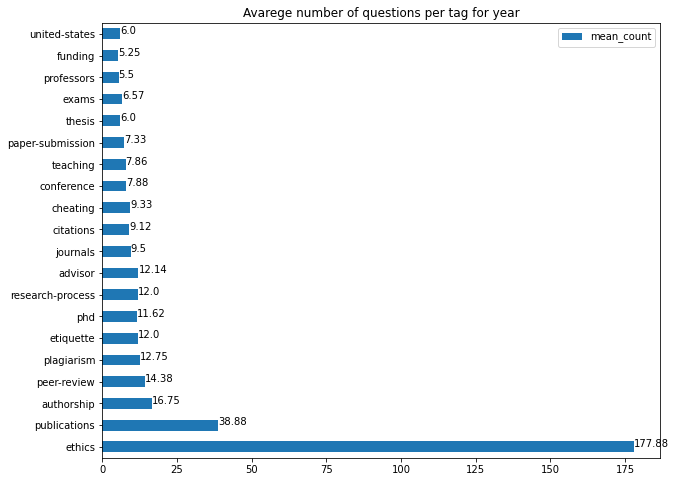

In [26]:
mask =(df['asked'] < pd.to_datetime('2020-01-01 00:00Z', utc=True))
limited = df.loc[mask]
avarege_tags_ammount_per_tag = pd.DataFrame()
for n in n_most_frequent_tags.to_list():
    mean = limited.loc[df.apply(lambda x :  n in x['tags'],axis=1)].groupby([df.asked.dt.year])['views'].count().mean()
    avarege_tags_ammount_per_tag = avarege_tags_ammount_per_tag.append(pd.Series({'mean_count' : mean}, name = n))
avarege_tags_ammount_per_tag.plot(kind ='barh', figsize = (10,8))

plt.title('Avarege number of questions per tag for year')
for index, value in enumerate(np.round(avarege_tags_ammount_per_tag['mean_count'],2)):
    plt.text(value, index, str(value))
plt.savefig('./figures/avarage_number_most_frequent',bbox_inches='tight')

## Basic Statistics of views for every tag

In [33]:
import itertools
import numpy as np
unique_tags = np.unique([*itertools.chain.from_iterable(df.tags)])

avarage_views_per_tag = pd.DataFrame()
for t in unique_tags:
    mask = df.tags.apply(lambda x:  t in x)
    subset_df = df[mask]

    description = subset_df['views'].describe()
    avarage_views_per_tag[t] = description
    
avarage_views_per_tag = avarage_views_per_tag.T
avarage_views_per_tag['tag'] = avarage_views_per_tag.index
avarage_views_per_tag.sort_values(by=['50%','mean'], ascending = False)

avarage_views_per_tag.loc['publications',:]


count             335
mean          2512.99
std           4945.72
min                31
25%             276.5
50%               717
75%              3000
max             50000
tag      publications
Name: publications, dtype: object

## How statistic for tags have changed in time


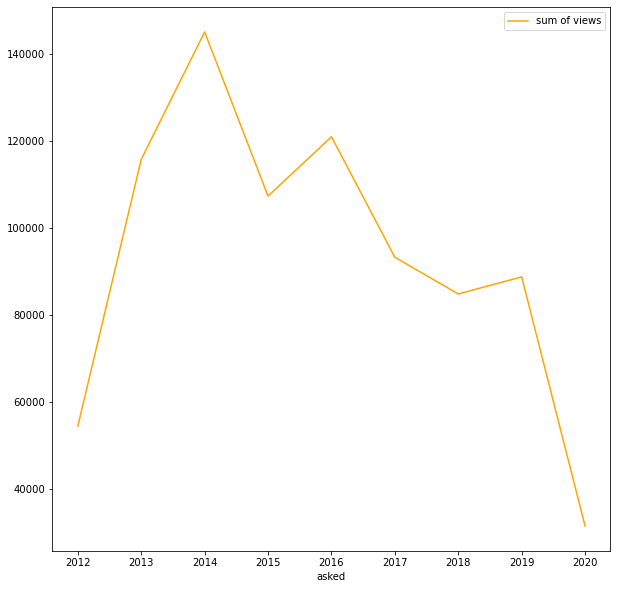

In [34]:
item = 'publications'
pub_views = df.loc[df.apply(lambda x :  item in x['tags'],axis=1)].groupby([df.asked.dt.year])['views'].sum()
pub_views = pub_views.rename('sum of views')
pub_count = df.loc[df.apply(lambda x :  item in x['tags'],axis=1)].groupby([df.asked.dt.year])['title'].count()
pub_count = pub_count.rename('count of question')

ax = pub_views.plot(color = 'orange', legend = True, figsize = (10,10))
# pub_count.plot(color = 'blue', figsize = (10,10), legend = True, title = 'Tendency of questions number and number of its view for question with tag ' + item)
# plt.savefig('./figures/tendecy_publications.png',bbox_inches = 'tight')


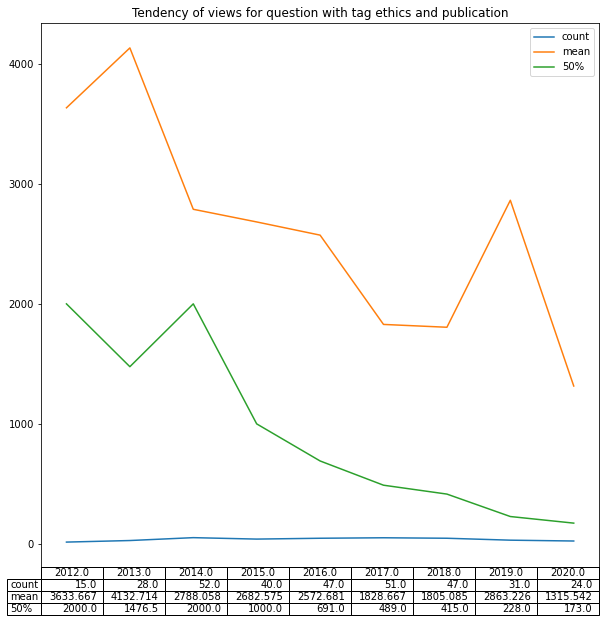

In [35]:
fig, ax = plt.subplots(1, 1)
views_describe = df.loc[df.apply(lambda x :  item in x['tags'],axis=1)].groupby([df.asked.dt.year])['views'].describe()
d = views_describe[['count','mean','50%']]

x_axis = ax.axes.get_xaxis()
ax.xaxis.tick_top()
x_axis.set_visible(False)
d.plot(ax = ax , figsize =(10,10),
                                            title = 'Tendency of views for question with tag ethics and publication',
                                           table = np.round(d.T,3))
plt.savefig('./figures/t_vies_publications',bbox_inches = 'tight')

## Avarage nuber of views, answers, and votes for n most frequent


In [36]:
most_popular = pd. DataFrame()
for t in n_most_frequent_tags.to_list():
    mean_views = df.loc[df.apply(lambda x :  t in x['tags'],axis=1)]['views'].mean()
    mean_answers_count =  df.loc[df.apply(lambda x :  t in x['tags'],axis=1)]['answers_count'].mean()
    mean_votes = df.loc[df.apply(lambda x :  t in x['tags'],axis=1)]['votes'].mean()
    most_popular = most_popular.append(pd.Series({'mean_views': mean_views, 'mean_answer_count' : mean_answers_count, 'mean_votes' : mean_votes},name = t))
most_popular




,mean_answer_count,mean_views,mean_votes
ethics,3.181522,3870.839948,16.760573
publications,2.549254,2512.994030,14.707463
authorship,2.846154,3019.132867,16.629371
peer-review,3.446281,3452.710744,24.793388
plagiarism,3.394737,5252.894737,24.298246
etiquette,3.264151,3869.622642,14.811321
phd,3.057692,3975.875000,18.105769
research-process,2.320000,2020.760000,11.730000
advisor,3.044944,3969.438202,21.471910
journals,2.696203,2391.101266,16.569620


,mean_answer_count,mean_views,mean_votes
cheating,5.92,15723.63,32.78
exams,5.31,15497.27,26.84
teaching,4.89,6947.05,25.52
united-states,4.41,6220.87,25.76
professors,3.47,4672.55,18.00
peer-review,3.45,3452.71,24.79
plagiarism,3.39,5252.89,24.30
etiquette,3.26,3869.62,14.81
ethics,3.18,3870.84,16.76
thesis,3.16,3814.88,16.51


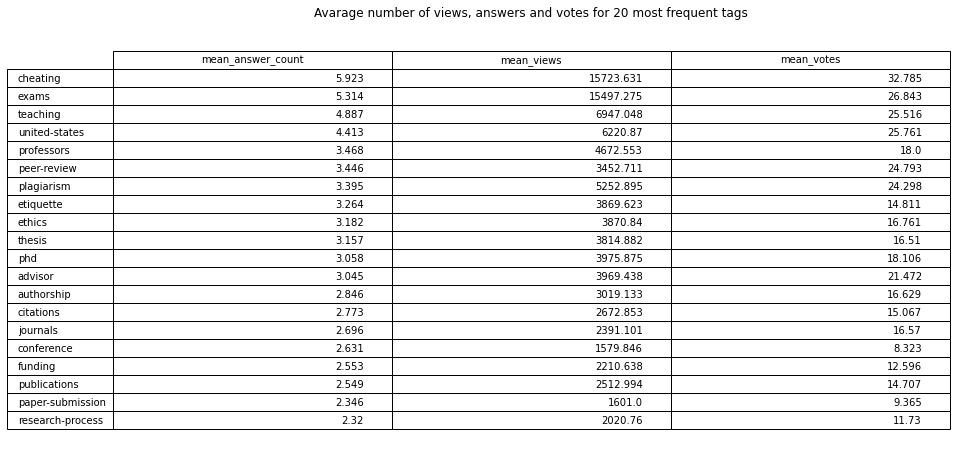

In [41]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

d = most_popular.sort_values(by = 'mean_answer_count', ascending= False)
plt.figure(figsize=(10,8))
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

t = table(ax, np.round(d,3),loc = 'center')  # where df is your data frame
t.set_fontsize(10)
t.scale(1.5, 1.5) 
# plt.subplots_adjust(left=0.2, bottom=0.2,)
plt.title('Avarage number of views, answers and votes for 20 most frequent tags')
# plt.savefig('./figures/popular_n_tags.png',bbox = 'tight')
d = d.round(2)
d.style.format("{:.2f}")
d.style.format("{:.2f}").apply(highlight_max)


## Comments count analyse

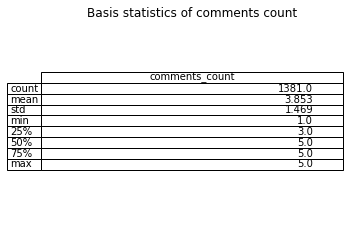

In [42]:
df['comments_count'] = df['comments'].str.len()
d = df['comments_count']. describe()

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table(ax, np.round(d,3),loc = 'center')  # where df is your data frame
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.title('Basis statistics of comments count')
plt.savefig('./figures/basic_commnets_count.png')


In [43]:
comments_count_df = pd.DataFrame()
for t in list(set(all_tags)):
    suma = df.loc[df.apply(lambda x :  t in x['tags'],axis=1)]['comments_count'].sum()
    mean = df.loc[df.apply(lambda x :  t in x['tags'],axis=1)]['comments_count'].mean()
    count = df.loc[df.apply(lambda x :  t in x['tags'],axis=1)]['comments_count'].count()
    comments_count_df = comments_count_df.append(pd.Series({'sum comments count': np.round(suma,3), 'mean comments count' : np.round(mean,3), 'count of question with a comment':count}, name = t))
comments_count_df

,count of question with a comment,mean comments count,sum comments count
united-states,43.0,3.930,169.0
supervision,19.0,3.632,69.0
authorship,128.0,4.031,516.0
lab-management,4.0,3.250,13.0
graduate-school,25.0,3.600,90.0
...,...,...,...
teaching,57.0,4.281,244.0
citations,67.0,3.716,249.0
plagiarism,106.0,4.038,428.0
cheating,62.0,4.274,265.0


In [44]:
comments_count_df = comments_count_df.sort_values(by='count of question with a comment', ascending= False)
comments_count_df.head(20)
comments_count_df.head(20).style.apply(highlight_max)

,count of question with a comment,mean comments count,sum comments count
ethics,1381.000000,3.853000,5321.000000
publications,297.000000,3.626000,1077.000000
authorship,128.000000,4.031000,516.000000
peer-review,109.000000,3.661000,399.000000
plagiarism,106.000000,4.038000,428.000000
phd,93.000000,3.634000,338.000000
etiquette,90.000000,3.844000,346.000000
research-process,87.000000,4.138000,360.000000
advisor,80.000000,3.988000,319.000000
journals,71.000000,3.944000,280.000000


In [45]:
list(set(all_tags))


['united-states',
 'supervision',
 'authorship',
 'lab-management',
 'graduate-school',
 'application',
 'errors-erratum',
 'methodology',
 'science',
 'disreputable-publishers',
 'professors',
 'conference',
 'personal-misconduct',
 'course-evaluation',
 'teaching-assistant',
 'responsibilities',
 'administration',
 'social-media',
 'harassment',
 'tenure-track',
 'graduate-admissions',
 'research-process',
 'outward-appearance',
 'university',
 'masters',
 'psychology',
 'postdocs',
 'social-skills',
 'ethics',
 'retraction',
 'computer-science',
 'academic-life',
 'group-dynamics',
 'irb',
 'policy',
 'united-kingdom',
 'thesis-committee',
 'peer-review',
 'industry',
 'salary',
 'writing',
 'anonymity',
 'copyright',
 'translations',
 'assessment',
 'sexual-misconduct',
 'students',
 'funding',
 'career-path',
 'workplace',
 'mathematics',
 'statement-of-purpose',
 'journals',
 'intellectual-property',
 'publications',
 'education',
 'advisor',
 'tuition',
 'interview',
 'facebook'

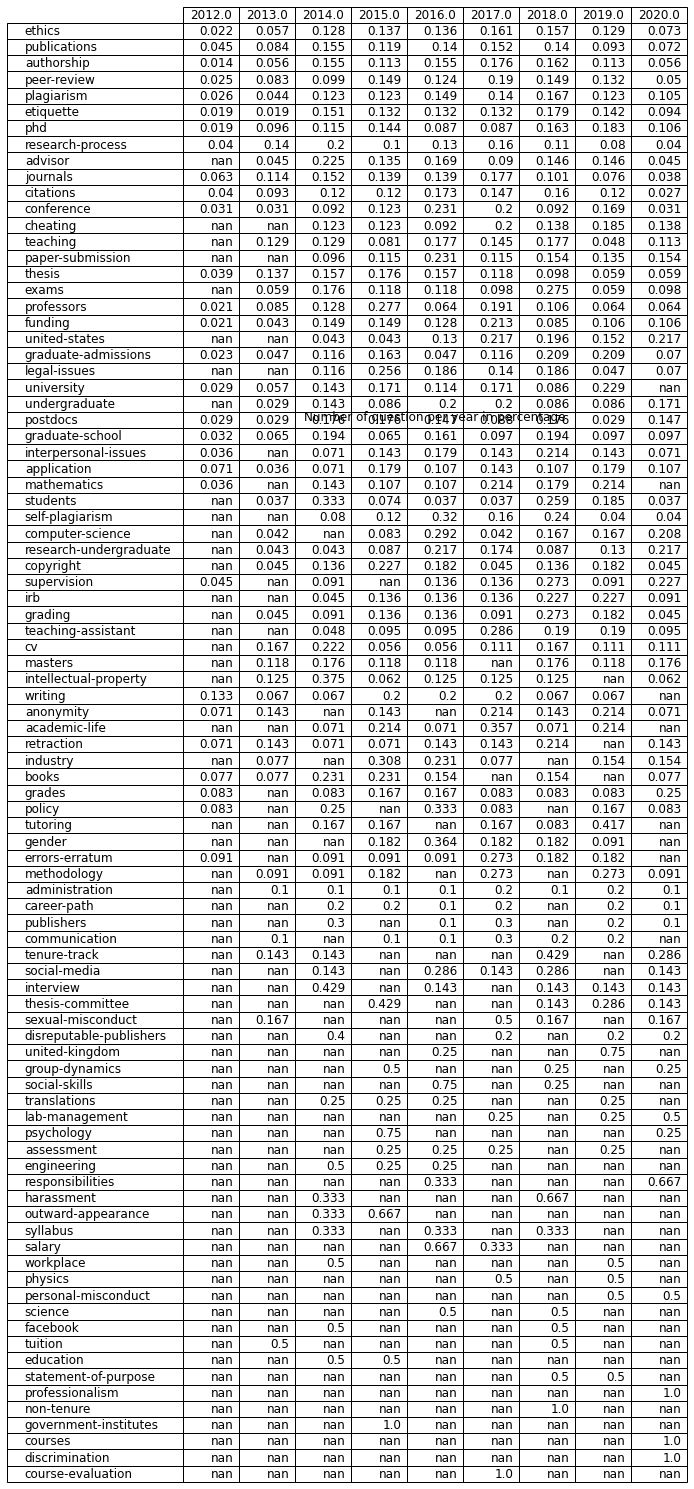

In [46]:
number_per_year_df = pd.DataFrame()
for t in list(set(all_tags)):
    one_record  = df.loc[df.apply(lambda x :  t in x['tags'],axis=1)]['title'].rename(t).groupby([df.asked.dt.year]).agg('count')
    number_per_year_df = number_per_year_df.append(one_record)
    
number_per_year_df = number_per_year_df.sort_index(axis=1)
cols = number_per_year_df.columns
number_per_year_df['sum'] = number_per_year_df.sum(axis=1)
number_per_year_df= number_per_year_df.sort_values(by='sum', ascending = False)
number_per_year_df = number_per_year_df[cols].div(number_per_year_df['sum'], axis=0)



plt.figure(figsize=(10,13))
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
t = table(ax, np.round(number_per_year_df,3),loc = 'center',)
t.set_fontsize(12)# where df is your data frame
t.scale(1,1.5)
plt.subplots_adjust(left=0.2, bottom=0.2)


plt.title('Number of question per year in percentage')
plt.savefig('./figures/number_of_question_per_year_for_every_tag.png', bbox_inches='tight')



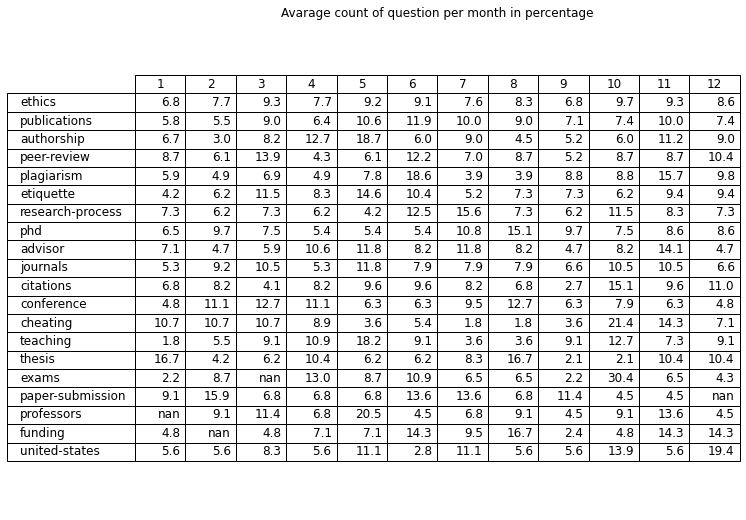

In [47]:
avg_per_month_df = pd.DataFrame()
for t in n_most_frequent_tags.tolist():
    one_record  = limited.loc[limited.apply(lambda x :  t in x['tags'],axis=1)]['title'].rename(t).groupby([limited.asked.dt.month]).agg('count')
    avg_per_month_df = avg_per_month_df.append(one_record)
    
avg_per_month_df = avg_per_month_df.sort_index(axis=1)
cols = avg_per_month_df.columns
avg_per_month_df['sum'] = avg_per_month_df.sum(axis=1)
avg_per_month_df= avg_per_month_df.sort_values(by='sum', ascending = False)
avg_per_month_df = (avg_per_month_df[cols].div(avg_per_month_df['sum'], axis=0))*100



plt.figure(figsize=(10,10))
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
t = table(ax, np.round(avg_per_month_df,1),loc = 'center',)
t.set_fontsize(12)# where df is your data frame
t.scale(1.2,1.7)
plt.subplots_adjust(left=0.2, bottom=0.2)


plt.title('Avarage count of question per month in percentage')
plt.savefig('./figures/avarege_amount_of_question_per_month.png', bbox_inches='tight')

In [48]:
with pd.ExcelWriter('number_per_month.xlsx') as writer:  
    for i in range(2012,2021):
        questions = df.loc[df['asked'].map(lambda x : x.year == i)]
        number_per_month_df = pd.DataFrame()
        for t in list(set(all_tags)):
            one_record  = questions.loc[questions.apply(lambda x :  t in x['tags'],axis=1)]['title'].rename(t).groupby([df.asked.dt.month]).agg('count')
            number_per_month_df = number_per_month_df.append(one_record.T)


        number_per_month_df = number_per_month_df.sort_index(axis=1)
        number_per_month_df = number_per_month_df.dropna(axis=0, how ='all')
        cols = number_per_month_df.columns
        number_per_month_df['sum'] = number_per_month_df.sum(axis=1)
        number_per_month_df = number_per_month_df[cols].div(number_per_month_df['sum'], axis=0)
        number_per_month_df= number_per_month_df.sort_index(axis=0)

        number_per_month_df.to_excel(writer,  'year_'+ str(i))


#     plt.figure(figsize=(13,13))
#     ax = plt.subplot(111, frame_on=False) # no visible frame
#     ax.xaxis.set_visible(False)  # hide the x axis
#     ax.yaxis.set_visible(False)  # hide the y axis
#     t = table(ax,  np.round(number_per_month_df,3),loc = 'center',)
#     t.set_fontsize(12)# where df is your data frame
#     t.scale(1,1.5)
#     plt.subplots_adjust(left=0.2, bottom=0.2)
#     plt.title('Percentage number of question per month in ' + str(i))

#     plt.savefig('./figures/number_of_question_per_month_for_every_tag_year)'+str(i)+'.png', bbox_inches='tight')

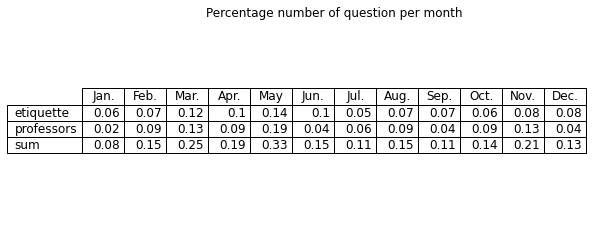

In [100]:
first_group = ['publications', 'peer-review', 'plagiarism', 'research-process', 'journals', 'paper-submission', 'authorship']
second_group = ['exams', 'cheating', 'teaching']
third_group = ['professors','etiquette']
forth_group = ['advisor', 'phd' ,'thesis']

new_ind= {1.0:'Jan.',2.0: 'Feb.',3.0: 'Mar.',4.0: 'Apr.',5.0: 'May',6.0:'Jun.',7.0:'Jul.',8.0: 'Aug.',9.0: 'Sep.', 10.0:'Oct.',11.0:'Nov.', 12.0:'Dec.'}

together = [first_group, second_group, third_group, forth_group]
for l in together[2:3]:
        number_per_month_df = pd.DataFrame()
        for t in l:
            one_record  = df.loc[df.apply(lambda x :  t in x['tags'],axis=1)]['title'].rename(t).groupby([df.asked.dt.month]).agg('count')
            number_per_month_df = number_per_month_df.append(one_record.T)


        number_per_month_df = number_per_month_df.sort_index(axis=1)
        number_per_month_df = number_per_month_df.dropna(axis=0, how ='all')
        cols = number_per_month_df.columns
        number_per_month_df['sum'] = number_per_month_df.sum(axis=1)
        number_per_month_df = number_per_month_df[cols].div(number_per_month_df['sum'], axis=0)
        number_per_month_df = number_per_month_df.sort_index(axis=0)

        number_per_month_df = number_per_month_df.rename(columns = new_ind)
        number_per_month_df.loc['sum'] = number_per_month_df.sum(axis=0)

        plt.figure(figsize=(10,4))
        ax = plt.subplot(111, frame_on=False) # no visible frame
        ax.xaxis.set_visible(False)  # hide the x axis
        ax.yaxis.set_visible(False)  # hide the y axis
        t = table(ax,  np.round(number_per_month_df,2),loc = 'center',)

        t.set_fontsize(12)# where df is your data frame
        t.scale(1,1.5)
        plt.subplots_adjust(left=0.2, bottom=0.2)
        plt.title('Percentage number of question per month')
       
        plt.savefig('./figures/number_of_question_per_month_for_every_tag_year_third_group.png', bbox_inches='tight')

